In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# End goal is not to make a perfect model but it is learning about keras and tensorflow

In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()

model.add(Dense(units=11, activation='relu', input_dim=11))
model.add(Dense(units=11, activation='relu', input_dim=11))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\jhota\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history=model.fit(X_train, y_train,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7775 - loss: 0.5437 - val_accuracy: 0.7975 - val_loss: 0.4476
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4534 - val_accuracy: 0.7980 - val_loss: 0.4297
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7972 - loss: 0.4360 - val_accuracy: 0.8180 - val_loss: 0.4209
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.4156 - val_accuracy: 0.8360 - val_loss: 0.4063
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8293 - loss: 0.4065 - val_accuracy: 0.8480 - val_loss: 0.3907
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.3907 - val_accuracy: 0.8515 - val_loss: 0.3742
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8396 - loss: 0.3819 - val_accuracy: 0.8530 - val_loss: 0.3643
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8538 - loss: 0.3574 - val_accuracy: 0.8540

In [ ]:
model.layers[0].get_weights()



[array([[-0.0164261 , -0.02556942,  0.10301407, -0.04466849, -0.1994054 ,
          0.06408374,  0.13694958, -0.01906248, -0.32165852, -0.08858722,
          0.07294191],
        [ 0.10374019, -1.0195668 , -0.06094149, -0.5477705 , -0.69653547,
         -0.6421145 , -0.43130434,  0.2327389 ,  0.46939576, -0.5174874 ,
          0.7241603 ],
        [-0.1831765 ,  0.07704034, -0.19286598,  0.18270631,  0.38617003,
         -0.01695275,  0.02489627, -0.23027232,  0.07460803, -0.47718218,
         -0.11960023],
        [-0.27259237,  0.08050682, -0.10147385, -0.18469755, -0.7233482 ,
          0.00555974,  0.82518053,  0.2289043 ,  0.37704736, -0.06193696,
         -0.002739  ],
        [-1.2115426 ,  0.08225888, -0.1347761 ,  0.03690504,  0.24400832,
         -0.07671575, -0.41080904,  1.2283865 , -0.38299602,  0.06650287,
         -0.10558151],
        [-0.10859828, -0.25396365,  0.04148808,  0.08347509, -0.1296508 ,
          0.05811457, -0.01516251, -0.12619835, -0.05077577, -0.3709154

In [48]:
ylog=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [49]:
import numpy as np
y_pred = np.where(ylog>0.5,1,0)# convert to binary output


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_pred)

0.861

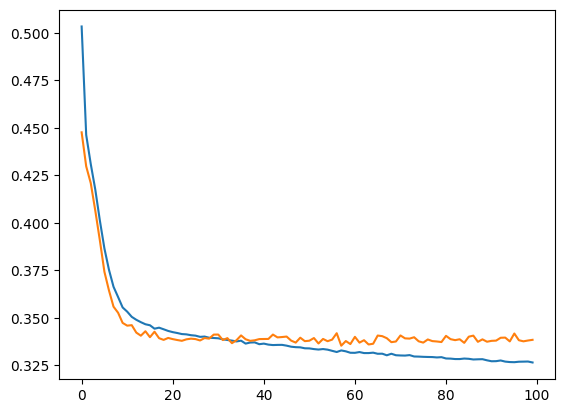

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

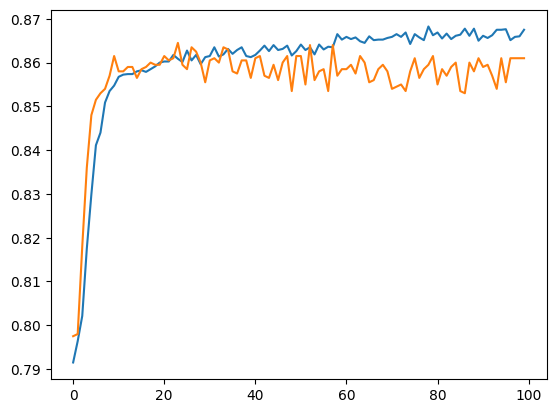

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])